Info of eurusd_data : 
 
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 0 entries
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   EURUSD  0 non-null      float64
dtypes: float64(1)
memory usage: 0.0 bytes
None


Head of eurusd_data : 
 
Empty DataFrame
Columns: [EURUSD]
Index: []


Tail of eurusd_data : 
 
Empty DataFrame
Columns: [EURUSD]
Index: []


Plot of eurusd_data: 


<AxesSubplot:xlabel='Date'>

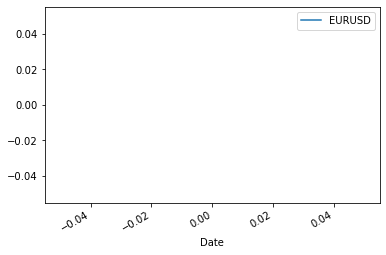

In [18]:
import requests
from bs4 import BeautifulSoup as BSoup
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
import warnings
from google.colab import drive

warnings.simplefilter('ignore')


end_year= pd.to_datetime('today').year
end_mth= pd.to_datetime('today').month
end_day= pd.to_datetime('today').day

end_dt= pd.Timestamp(datetime(end_year,end_mth,end_day),'D')
start_dt = end_dt - pd.DateOffset(days=365)

start_year= start_dt.year
start_mth= start_dt.month
start_day= start_dt.day

end_date= str(end_year) + '-' + str(end_mth) + '-' + str(end_day)
start_date= str(start_year) + '-' + str(start_mth) + '-' + str(start_day)

period= end_dt- start_dt
num_days= period.days

date_series= []
eurusd_series=[]

url= 'https://api.exchangeratesapi.io/history?start_at=' + start_date + '&end_at=' + end_date
web= requests.get(url)
soup = BSoup(web.text)
json_data= web.json()

for i in range(num_days):
  
  extract_date= start_dt + pd.Timedelta(i, unit='D')
  str_year= str(extract_date.year)

  if extract_date.month < 10:
    str_month= '0' + str(extract_date.month)
  else:
    str_month= str(extract_date.month)

  if extract_date.day < 10:
    str_day= '0' + str(extract_date.day)
  else:
    str_day= str(extract_date.day)

  str_date= str_year + '-' + str_month + '-' + str_day  
  
  date_series.append(str_date)

  try:
    eurusd_series.append(json_data["rates"][str_date]['USD'])
  except:
    eurusd_series.append(np.NaN)
  
eurusd_data= pd.DataFrame({'Date':pd.to_datetime(date_series,format="%Y-%m-%d"),'EURUSD':eurusd_series})
eurusd_data.index= eurusd_data.Date
eurusd_data.drop(["Date"],axis=1,inplace=True)

eurusd_data.dropna(inplace=True)

print('Info of eurusd_data : \n ')
print(eurusd_data.info())
print('\n')
print('Head of eurusd_data : \n ')
print(eurusd_data.head(10))
print('\n')
print('Tail of eurusd_data : \n ')
print(eurusd_data.tail(10))
print('\n')
print('Plot of eurusd_data: ')
eurusd_data.plot()


In [ ]:
import requests
from bs4 import BeautifulSoup as BSoup
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
import warnings
from google.colab import drive

warnings.simplefilter('ignore')


end_year= pd.to_datetime('today').year
end_mth= pd.to_datetime('today').month
end_day= pd.to_datetime('today').day

end_dt= pd.Timestamp(datetime(end_year,end_mth,end_day),'D')
start_dt = end_dt - pd.DateOffset(days=365)

start_year= start_dt.year
start_mth= start_dt.month
start_day= start_dt.day

end_date= str(end_year) + '-' + str(end_mth) + '-' + str(end_day)
start_date= str(start_year) + '-' + str(start_mth) + '-' + str(start_day)

period= end_dt- start_dt
num_days= period.days

date_series= []
eurusd_series=[]

url= 'https://api.exchangeratesapi.io/history?start_at=' + start_date + '&end_at=' + end_date
web= requests.get(url)
soup = BSoup(web.text)
json_data= web.json()

for i in range(num_days):
  
  extract_date= start_dt + pd.Timedelta(i, unit='D')
  str_year= str(extract_date.year)

  if extract_date.month < 10:
    str_month= '0' + str(extract_date.month)
  else:
    str_month= str(extract_date.month)

  if extract_date.day < 10:
    str_day= '0' + str(extract_date.day)
  else:
    str_day= str(extract_date.day)

  str_date= str_year + '-' + str_month + '-' + str_day  
  
  date_series.append(str_date)

  try:
    eurusd_series.append(json_data["rates"][str_date]['USD'])
  except:
    eurusd_series.append(np.NaN)
  
eurusd_data= pd.DataFrame({'Date':pd.to_datetime(date_series,format="%Y-%m-%d"),'EURUSD':eurusd_series})
eurusd_data.index= eurusd_data.Date
eurusd_data.drop(["Date"],axis=1,inplace=True)

eurusd_data.dropna(inplace=True)

print('Info of eurusd_data : \n ')
print(eurusd_data.info())
print('\n')
print('Head of eurusd_data : \n ')
print(eurusd_data.head(10))
print('\n')
print('Tail of eurusd_data : \n ')
print(eurusd_data.tail(10))
print('\n')
print('Plot of eurusd_data: ')
eurusd_data.plot()
